## Request

**Furyal Ahmed** 11:36 AM <br>
ok the pdb i am wanting to align is 2vuk. I want to align the crimm prepared structure to the structure at `/home/fahmed/Dataset/lit-pcba/TP53/2vuk_protein.mol2`

In [1]:
from rdkit import Chem
import nglview as nv

In [2]:
target_recep = Chem.MolFromMol2File('./2vuk_protein.mol2', removeHs=False)

In [3]:
view = nv.show_rdkit(target_recep)
view.add_representation('surface', opacity=0.4)
view

NGLWidget()

In [4]:
atoms = list(target_recep.GetAtoms())
len(atoms)

3030

In [5]:
with open('./2vuk_protein.mol2', 'r') as f:
    lines = f.readlines()

In [6]:
atom_lines = []
is_atom = False
for line in lines:
    if '@<TRIPOS>ATOM' in line:
        is_atom = True
        continue
    if '@<TRIPOS>BOND' in line:
        break
    if is_atom:
        atom_lines.append(line.strip())

In [7]:
from collections import namedtuple
info_t = namedtuple('atom_info',('serial', 'name', 'x', 'y', 'z', 'sybyl_type', 'resid', 'resname', 'resseq'))

In [8]:
atom_lines[:10]

['1 N         145.4500   79.8080  -32.6780 N.am      1 SER95       0.0000 BACKBONE|DICT|DIRECT',
 '2 CA        145.0180   80.4910  -33.9380 C.3       1 SER95       0.0000 BACKBONE|DICT|DIRECT',
 '3 C         145.6290   81.8810  -34.0760 C.2       1 SER95       0.0000 BACKBONE|DICT|DIRECT',
 '4 O         145.9980   82.4990  -33.0720 O.2       1 SER95       0.0000 BACKBONE|DICT|DIRECT',
 '5 CB        143.4940   80.6100  -33.9650 C.3       1 SER95       0.0000 DICT',
 '6 OG        142.9100   79.3260  -33.9450 O.3       1 SER95       0.0000 DICT',
 '7 H         145.2260   80.2090  -31.7900 H         1 SER95       0.0000 BACKBONE|DICT|ESSENTIAL|DIRECT',
 '8 HA        145.3090   79.9360  -34.7170 H         1 SER95       0.0000 BACKBONE|DICT|DIRECT',
 '9 HB2       143.2140   81.0880  -34.7970 H         1 SER95       0.0000 DICT',
 '10 HB3       143.1880   81.1260  -33.1650 H         1 SER95       0.0000 DICT']

In [9]:
atom_info = []
for entry in atom_lines:
    entry = entry.split()[:8]
    last_field = entry.pop(-1)
    resname, resseq = last_field[:3], last_field[3:]
    entry.extend([resname, resseq])
    atom_info.append(info_t(*entry))

In [10]:
atom_info[:10]

[atom_info(serial='1', name='N', x='145.4500', y='79.8080', z='-32.6780', sybyl_type='N.am', resid='1', resname='SER', resseq='95'),
 atom_info(serial='2', name='CA', x='145.0180', y='80.4910', z='-33.9380', sybyl_type='C.3', resid='1', resname='SER', resseq='95'),
 atom_info(serial='3', name='C', x='145.6290', y='81.8810', z='-34.0760', sybyl_type='C.2', resid='1', resname='SER', resseq='95'),
 atom_info(serial='4', name='O', x='145.9980', y='82.4990', z='-33.0720', sybyl_type='O.2', resid='1', resname='SER', resseq='95'),
 atom_info(serial='5', name='CB', x='143.4940', y='80.6100', z='-33.9650', sybyl_type='C.3', resid='1', resname='SER', resseq='95'),
 atom_info(serial='6', name='OG', x='142.9100', y='79.3260', z='-33.9450', sybyl_type='O.3', resid='1', resname='SER', resseq='95'),
 atom_info(serial='7', name='H', x='145.2260', y='80.2090', z='-31.7900', sybyl_type='H', resid='1', resname='SER', resseq='95'),
 atom_info(serial='8', name='HA', x='145.3090', y='79.9360', z='-34.7170',

In [11]:
a = atom_info[0]

In [12]:
from crimm.StructEntities import Atom, Residue, Chain, PolymerChain, Model
import numpy as np

In [13]:
atom = Atom(
    name = a.name,
    coord = np.array([a.x, a.y, a.z], dtype=np.float64),
    serial_number = a.serial,
    element = a.sybyl_type.split('.')[0]
)

In [14]:
atom

<Atom N>

In [15]:
model = Model(1)
model.pdb_id = '2VUK'
chain = Chain('A')
model.add(chain)
for a in atom_info:
    resseq = int(a.resseq)
    if resseq not in chain:
        res = Residue(resseq, a.resname, 'PROA', a.resid)
        chain.add(res)
    atom = Atom(
        name = a.name,
        coord = np.array([a.x, a.y, a.z], dtype=np.float64),
        serial_number = int(a.serial),
        element = a.sybyl_type.split('.')[0]
    )
    res.add(atom)

In [16]:
model

NGLWidget()

<Model id=1 Chains=1>
	│
	├───<Chain id=A Residues=196>


In [17]:
Residue?

Init signature: Residue(res_id, resname, segid, author_seq_id=None)
Docstring:     
Residue class derived from Biopython Residue and made compatible with
CHARMM Topology.

init args:
res_id: int or (str, int, str)
    Residue id can be either residue sequence number (int) or a Biopython style
    resid tuple with (hetfield:str, resseq:int, icode:str). If only residue
    sequence number is given, the residue is assumed to be a canonical residue.
resname: str
    Residue name.
segid: str
    Segment identifier.
author_seq_id: int, optional
    Author sequence number.
Init docstring: Initialize the class.
File:           ~/crimm/crimm/StructEntities/Residue.py
Type:           type
Subclasses:     Heterogen

In [18]:
Atom?

Init signature:
Atom(
    name,
    coord,
    bfactor=0.0,
    occupancy=1.0,
    altloc=' ',
    fullname=None,
    serial_number=0,
    element=None,
    pqr_charge=None,
    radius=None,
    topo_definition=None,
) -> None
Docstring:     
Atom class derived from Biopython Residue and made compatible with
CHARMM

init args:
name: str
    Atom name.
coord: numpy.ndarray
    Atom coordinates. in the form of np.array([x, y, z])
bfactor: float, optional
    B-factor value. Default to 0.0.
occupancy: float, optional
    Occupancy value. Default to 1.0.
altloc: str, optional
    Alternate location indicator. Default to ' '.
fullname: str, optional
    Full atom name. Should be four character long, e.g, ' CA ' for 'CA' (alpha carbon).
    Default to f"{name:^4}".
serial_number: int, optional
    Atom serial number. Default to 0. This will be automatically updated as structure is built.
element: str, optional
    Element symbol.
pqr_charge: float, optional
    Charge value from PQR file.
ra

In [19]:
from crimm.Fetchers import fetch_rcsb
from crimm.Superimpose import ChainSuperimposer

In [20]:
move_model = fetch_rcsb('2VUK', organize=True)

/home/truman/crimm/crimm/StructEntities/Model.py:99: UserWarning: Chain E not found in model 1
  warnings.warn(
/home/truman/crimm/crimm/StructEntities/Model.py:84: UserWarning: Insufficient atoms for connect record metalc
  warnings.warn(


In [21]:
move_model

NGLWidget()

<OrganizedModel model=2VUK Polypeptide(L)=1 Solvent=1 Ion=1 >
	│
	├───<Polypeptide(L) id=A Residues=195>
	├──────Description: CELLULAR TUMOR ANTIGEN P53
	│
	├───<Ion id=B Residues=1>
	├──────Residue ID(s): ZN
	├──────Description: ZINC ION
	│
	├───<Solvent id=C Residues=221>
	├──────Residue ID(s): HOH
	├──────Description: water


In [22]:
from crimm.Utils.StructureUtils import chain_to_polymerchain
chain = chain_to_polymerchain(chain)
chain

NGLWidget()

<Polypeptide(L) id=A Residues=196>


In [23]:
simp = ChainSuperimposer()
simp.set_chains(
    chain, 
    move_model['A'], 
    on_atoms = 'all'
)

In [24]:
simp.show()

NGLWidget()

In [25]:
simp.apply_transform()

In [26]:
simp.show()

NGLWidget()

In [27]:
move_model

NGLWidget()

<OrganizedModel model=2VUK Polypeptide(L)=1 Solvent=1 Ion=1 >
	│
	├───<Polypeptide(L) id=A Residues=195>
	├──────Description: CELLULAR TUMOR ANTIGEN P53
	│
	├───<Ion id=B Residues=1>
	├──────Residue ID(s): ZN
	├──────Description: ZINC ION
	│
	├───<Solvent id=C Residues=221>
	├──────Residue ID(s): HOH
	├──────Description: water


In [28]:
simp.rotran

(array([[ 9.99002279e-01, -1.27048620e-02,  4.28139393e-02],
        [ 1.27405458e-02,  9.99918679e-01, -5.60691677e-04],
        [-4.28033341e-02,  1.10560522e-03,  9.99082906e-01]]),
 array([30.21641701, 10.70765242, -4.10996539]))

In [29]:
simp.apply_transform(move_model['B'])
simp.apply_transform(move_model['C'])

In [30]:
from crimm.Visualization.NGLVisualization import show_nglview_multiple

In [31]:
show_nglview_multiple([*move_model.chains, chain])

NGLWidget()

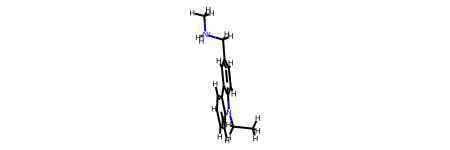

In [32]:
lig_mol = Chem.MolFromMol2File('./2vuk_ligand.mol2', removeHs=False)
lig_mol

In [33]:
from crimm.Adaptors.RDKitConverter import RDKitHetConverter

In [34]:
rdconvert = RDKitHetConverter()

In [35]:
rdconvert.load_rdkit_mol(lig_mol, 'LIG')

In [36]:
lig = rdconvert.get_ligand()

In [37]:
lig

NGLWidget()

<Residue LIG het=H_LIG resseq=1 icode= >


In [38]:
move_model.add_ligand(lig)
move_model

NGLWidget()

<OrganizedModel model=2VUK Polypeptide(L)=1 Solvent=1 Ligand=1 Ion=1 >
	│
	├───<Polypeptide(L) id=A Residues=195>
	├──────Description: CELLULAR TUMOR ANTIGEN P53
	│
	├───<Ion id=B Residues=1>
	├──────Residue ID(s): ZN
	├──────Description: ZINC ION
	│
	├───<Solvent id=C Residues=221>
	├──────Residue ID(s): HOH
	├──────Description: water
	│
	├───<Ligand id=D Molecules=1>
	├──────Residue ID(s): ['LIG']


In [39]:
from charmm_loading import build_loop, generate_topology, load_charmm, solvate, write_charmm
from crimm.Modeller.CoordManipulator import CoordManipulator

In [40]:
## Place the model center to (0, 0, 0) and place the principle axis along x-axis
coord_man = CoordManipulator()
coord_man.load_entity(move_model)
coord_man.orient_coords()

In [41]:
build_loop(move_model)

In [42]:
generate_topology(move_model)

/home/truman/crimm/crimm/Modeller/TopoLoader.py:738: UserWarning: No cmap found in <Polypeptide(L) id=A Residues=195>.
  warnings.warn(
Unexpected number (9) of atoms in residue SER   3 A   in conformation 1A
Unexpected number (13) of atoms in residue ARG 197 A   in conformation 1A


No protonation patches to apply on chain A.


In [43]:
load_charmm(move_model)

  
 CHARMM>     read rtf card -
 CHARMM>     name /tmp/tmpu_wgsoxv
 VOPEN> Attempting to open::/tmp/tmpu_wgsoxv::
 MAINIO> Residue topology file being read from unit  91.
 TITLE> * PROTEIN RTF LOADED FROM CRIMM
 TITLE> 36  2
 VCLOSE: Closing unit   91 with status "KEEP"
  
 CHARMM>     
  
  
 CHARMM>     read param card -
 CHARMM>     name /tmp/tmpqxlqvrtt -
 CHARMM>     flex
 VOPEN> Attempting to open::/tmp/tmpqxlqvrtt::

          PARAMETER FILE BEING READ FROM UNIT 91
 TITLE> * PROTEIN PRM LOADED FROM CRIMM
 TITLE> *>>>> CHARMM36 ALL-HYDROGEN PARAMETER FILE FOR PROTEINS <<<<<<<<<<
 TITLE> *>>>>> INCLUDES PHI, PSI CROSS TERM MAP (CMAP) CORRECTION <<<<<<<<
 TITLE> *>>>>>>>>>>>>>>>>>>>>>>>>>> JAN. 2016 <<<<<<<<<<<<<<<<<<<<<<<<<<<<
 TITLE> * ALL COMMENTS TO THE CHARMM WEB SITE: WWW.CHARMM.ORG
 TITLE> *             PARAMETER SET DISCUSSION FORUM
 TITLE> *
 PARMIO> NONBOND, HBOND lists and IMAGE atoms cleared.
 VCLOSE: Closing unit   91 with status "KEEP"
  
 CHARMM>     
  
  
 CHARMM> 

/home/truman/crimm/crimm/Adaptors/pyCHARMMAdaptors.py:449: UserWarning: Absolute harmonic restraints setup success: True
  warnings.warn(f"Absolute harmonic restraints setup success: {has_cons_harm}")




 STEEPD> An energy minimization has been requested.

 NSTEP  =          300   NPRINT =           10
 STEP   =    0.0200000   TOLFUN =    0.0010000
 TOLGRD =    0.0010000   TOLSTP =    0.0000000

MINI MIN: Cycle      ENERgy      Delta-E         GRMS    Step-size
MINI INTERN:          BONDs       ANGLes       UREY-b    DIHEdrals    IMPRopers
MINI CROSS:           CMAPs        PMF1D        PMF2D        PRIMO
MINI EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
 ----------       ---------    ---------    ---------    ---------    ---------
MINI>        0  -1822.14105      0.00000     26.95463      0.02000
MINI INTERN>      332.44894    542.60085     42.33030   1799.57027     36.15612
MINI CROSS>       -24.27059      0.00000      0.00000      0.00000
MINI EXTERN>     -221.29841  -4329.67853      0.00000      0.00000      0.00000
 ----------       ---------    ---------    ---------    ---------    ---------
MINI>       10  -2863.59107   1041.45001      6.64207  

In [44]:
solvate(move_model)

Total charges before adding ions: 6.0
  [Chain A] 3.0
  [Chain B] 2.0
  [Chain D] 1.0
[crimm] Loading water chain WT00
  
 CHARMM>     read sequence pdb -
 CHARMM>     name /tmp/tmpuz88ntma
 VOPEN> Attempting to open::/tmp/tmpuz88ntma::
 MAINIO> Sequence information being read from unit  91.
 TITLE>  *

          RESIDUE SEQUENCE --   221 RESIDUES
          TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    
          TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    
          TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    
          TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3    TIP3   

/home/truman/crimm/crimm/Adaptors/pyCHARMMAdaptors.py:457: UserWarning: Atom fix constraint setup success: True
  warnings.warn(f"Atom fix constraint setup success: {has_cons_fix}")



 General atom nonbond list generation found:
  6399727 ATOM PAIRS WERE FOUND FOR ATOM LIST
   431856 GROUP PAIRS REQUIRED ATOM SEARCHES

 SPACE FOR  4671176 ATOM PAIRS AND        0 GROUP PAIRS

 Image nonbond list generation found:
  1397550 ATOM PAIRS WERE FOUND FOR ATOM LIST
        0 ATOM PAIRS WERE FOUND FOR ATOM SELF LIST
   141972 GROUP PAIRS REQUIRED ATOM SEARCHES

 PRNHBD: CUToff Hydrogen Bond  distance =    0.5000   Angle =   90.0000
         CuT switching ON HB dist. =     3.5000  OFf HB dist. =    4.0000
         CuT switching ON Hb Angle =    50.0000  OFf Hb Angle =   70.0000
         ACCEptor antecedents included
         All hydrogen bonds for each hydrogen will be found
         Hydrogen bonds between excluded atoms will be kept

 HBFIND-exclusions:******* due to distance cutoff,       0 due to angle cutoff
                         0 primary donor to image acceptor hbonds found
 HBFIND-exclusions:******* due to distance cutoff,       0 due to angle cutoff
              

In [45]:
move_model

NGLWidget()

<OrganizedModel model=2VUK Polypeptide(L)=1 Solvent=2 Ligand=1 Ion=2 >
	│
	├───<Polypeptide(L) id=A Residues=195>
	├──────Description: CELLULAR TUMOR ANTIGEN P53
	│
	├───<Ion id=B Residues=1>
	├──────Residue ID(s): ZN
	├──────Description: ZINC ION
	│
	├───<Solvent id=C Residues=221>
	├──────Residue ID(s): HOH
	├──────Description: water
	│
	├───<Ligand id=D Molecules=1>
	├──────Residue ID(s): ['LIG']
	│
	├───<Solvent id=WA Residues=7150>
	├──────Description: water
	│
	├───<Ion id=IA Residues=6>
	├──────Description: balancing ions (CLA)


In [46]:
write_charmm('2vuk')

  
 CHARMM>     write name 2vuk.psf -
 CHARMM>     psf card
 VOPEN> Attempting to open::2vuk.psf::
 RDTITL>  
 RDTITL> No title read.
 VCLOSE: Closing unit   91 with status "KEEP"
 VCLOSE: Closing unit   91 with status "KEEP"
  
 CHARMM>     
  
  
 CHARMM>     write name 2vuk.crd -
 CHARMM>     coor card
 VOPEN> Attempting to open::2vuk.crd::
 RDTITL>  
 RDTITL> No title read.
 VCLOSE: Closing unit   91 with status "KEEP"
 VCLOSE: Closing unit   91 with status "KEEP"
  
 CHARMM>     
  
